In [2]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them

import scipy.optimize as opt
import scipy.linalg as la
import scipy.integrate as int


In [3]:
 def toggle_odefun(t,x,a,b):
    x1=x[0] 
    x2=x[1]
    
    dx1dt=-x1 + a/(1+x2**b)
    dx2dt=-x2 + a/(1+x1**b)

    
    return np.array([dx1dt,dx2dt])


### Plotting the vector (arrow) field

***Define parameters! ***

In [8]:
a=2
b=4

Next, define t (dummy value here), and then range of x1 and x2 values over which we'll make the plot.  

In [11]:
t=0   #MUST define a value of time for calling ode function above, even if it is not used in defining the ODE 

x1min=0
x1max=a*1.5
numptsx1=12
x1list=np.linspace(x1min,x1max,numptsx1)

x2min=0
x2max=a*1.5
numptsx2=12
x2list=np.linspace(x2min,x2max,numptsx2)


Next, we are going to define a grid of x1 and x2 values, based on the lists
above. The (i,j) point on that grid will correspond to elements (i,j) in four matrices that we are about to make.
* x1 values increase across ROWS (horizontal direction, index j)
* x2 values increase down COLUMNS (vertical direction, index i)

In [14]:
x1array,x2array = np.meshgrid(x1list,x2list)
dx1dt_array=np.zeros(x1array.shape)
dx2dt_array=np.zeros(x1array.shape)

Compute vector field at these points

In [17]:

for i in np.arange(numptsx1):
    for j in np.arange(numptsx2):
        
        #here, F is an array of velocities in x1 and x2 directions    
        F=toggle_odefun(t,[x1array[i,j],x2array[i,j]],a,b)

        #We fill in these two matrices with the corresponding velocities
        dx1dt_array[i,j]=F[0]
        dx2dt_array[i,j]=F[1]

    

### Add nullclines

In [20]:
x1list_fine=np.linspace(x1min,x1max,100)
x2list_fine=np.linspace(x2min,x2max,100)


x2_nullcline_list=a/(1+x1list_fine**b) ;
x1_nullcline_list=a/(1+x2list_fine**b) ;

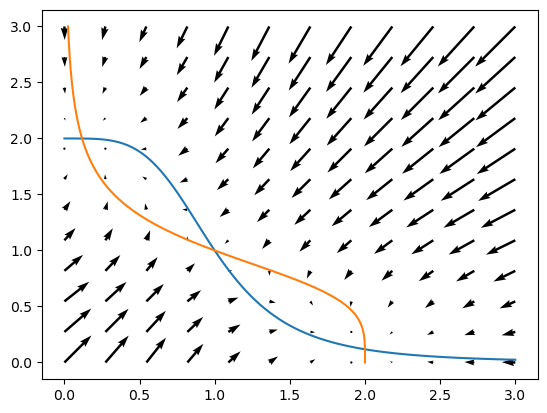

In [22]:
plt.figure(1)
plt.plot(x1list_fine,x2_nullcline_list)
plt.plot(x1_nullcline_list,x2list_fine)
        
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array) 

### Solving the ODE via scipy integrate module, which we imported above

We pass a time range, initial condition, and evaluation  time list into solve_ivp as follows

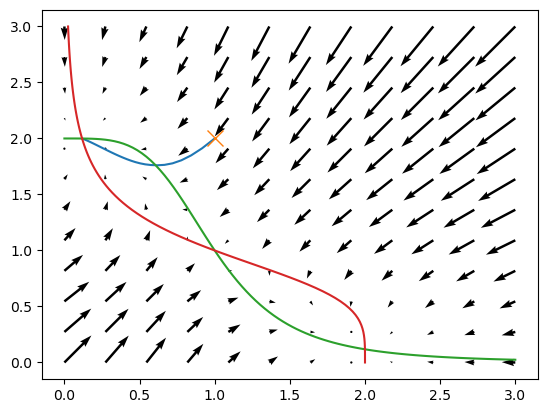

In [26]:
#specify our initial condition
x0=np.array([1,2])

#specify trange, a time range for simulation: two element array
tstart=0
tend=10
trange=np.array([tstart,tend])

#specify tlist,  a list of time points at which want to return the solution
numt=100
tlist=np.linspace(tstart,tend,numt)

sol=int.solve_ivp(toggle_odefun, trange, x0, t_eval=tlist,args=(a,b))

#Plot the trajectory 
plt.plot(sol.y[0,:],sol.y[1,:])

#Add an x at initial condition
plt.plot(sol.y[0,0],sol.y[1,0],'x',markersize=12)


#and add quiver, nullclines
plt.plot(x1list_fine,x2_nullcline_list)
plt.plot(x1_nullcline_list,x2list_fine)
plt.quiver(x1array,x2array,dx1dt_array,dx2dt_array) 


### Now let's add noise to each timestep, giving a stochastic differential equation

Implement STOCHASTIC euler method integration, for gaussian white noise with amplitude eps


In [29]:
eps=.4

In [31]:
# number of timesteps of size h I need to take to get to Tmax
h=0.01   # timestep
Tmax=5000
numsteps=round(Tmax/h)

t_list=h*np.arange(numsteps)

Make a dummy array that is going to hold my trajectory.
Each column is the solution at one timestep 
col 1 is initial state, col 2 is timestep h, col 2 is timestep h+1, ...
Note that the columns are of length 2:  first element is x1(t), second
element is x2(t)


In [34]:
x_array=np.zeros((2,numsteps))

Initialize with initial state x0 from above

In [37]:
x_array[:,0]=x0

now, do the STOCHASTIC euler method!

#### Initialize random number generator

In [41]:
rng = np.random.default_rng()

In [43]:
for t in range(numsteps-1):
    r = rng.standard_normal(2)  #draw normal variable (standard -- mean,var are 0,1)
    x_array[:,t+1] = x_array[:,t] + h*toggle_odefun(t,x_array[:,t],a,b) + eps*np.sqrt(h)*r



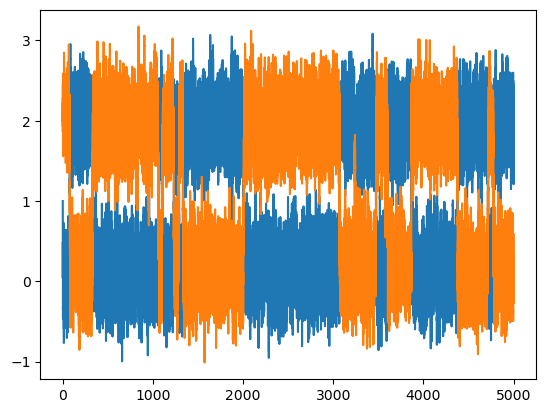

In [44]:
plt.plot(t_list,x_array[0,:])
plt.plot(t_list,x_array[1,:])

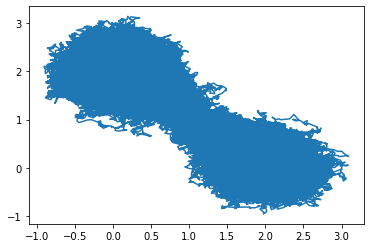

In [22]:
plt.plot(x_array[0,:],x_array[1,:])